In [3]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


1.	Скачать или импортировать в notebook датасет Wine, после чего отобразить первые и последние 5 строк датасета

In [4]:
from ucimlrepo import fetch_ucirepo 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
import sklearn.metrics as skmetrics
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.preprocessing import label_binarize

   
wine = fetch_ucirepo(id=109) 
  
data_features = wine.data.features 
data_targets = wine.data.targets



display(data_features)
display(data_targets)




,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


2.	Необходимо рассмотреть данные и провести анализ( количество семплов, типы данных в ячейках, распределение, корреляция…). Желательно придти к какому-то выводу после рассмотрения

In [5]:
data_features.info()
data_features.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
count_NaN = data_features.isna().sum()
count_NaN

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [7]:
corr_matrix = data_features.corr()
corr_matrix_unstacked = corr_matrix.abs().unstack()
corr_matrix_unstacked = corr_matrix_unstacked.sort_values(ascending = False).drop_duplicates()
corr_matrix_unstacked = corr_matrix_unstacked[corr_matrix_unstacked < 1]
corr_matrix_unstacked

Total_phenols                 Flavanoids           0.864564
0D280_0D315_of_diluted_wines  Flavanoids           0.787194
                              Total_phenols        0.699949
Proanthocyanins               Flavanoids           0.652692
Proline                       Alcohol              0.643720
                                                     ...   
Magnesium                     Malicacid            0.054575
Proanthocyanins               Color_intensity      0.025250
Color_intensity               Alcalinity_of_ash    0.018732
Proanthocyanins               Ash                  0.009652
0D280_0D315_of_diluted_wines  Ash                  0.003911
Length: 78, dtype: float64

3.	 Произвести визуализации пункта 2, а также провести анализ с помощью библиотек matplotlib,seaborn

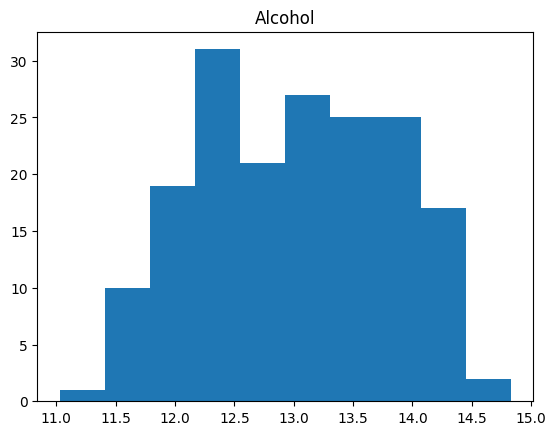

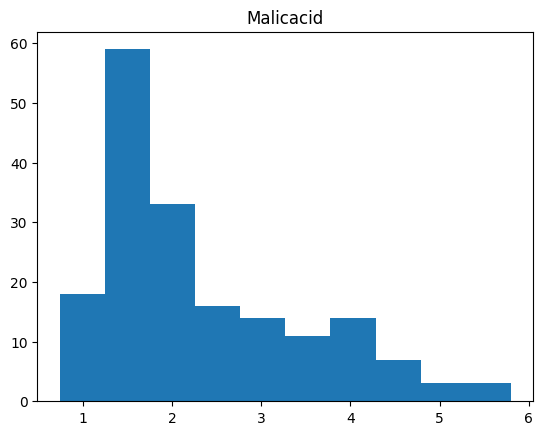

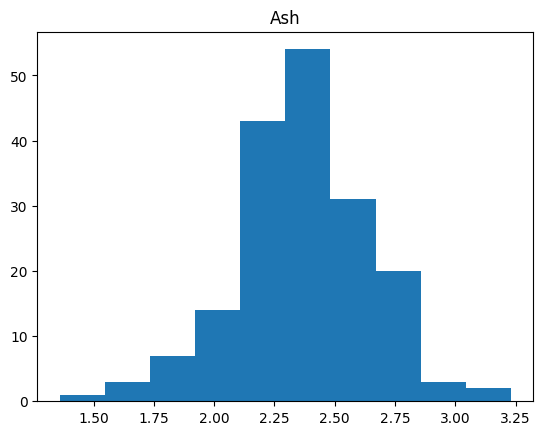

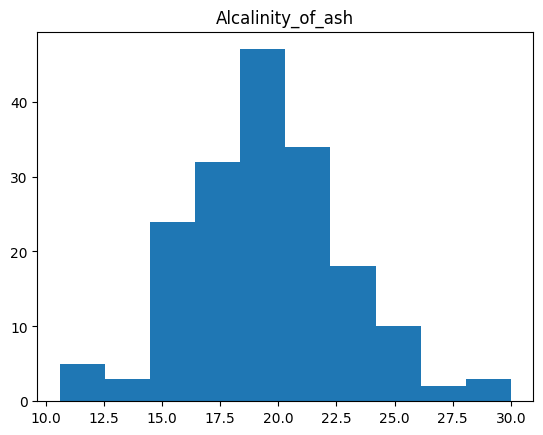

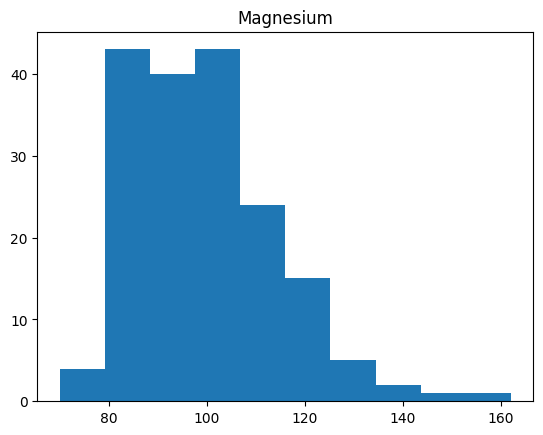

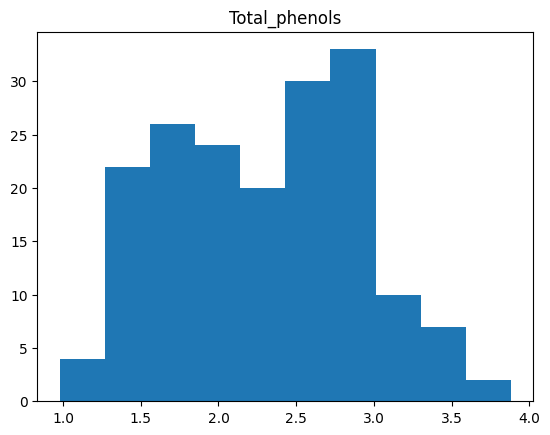

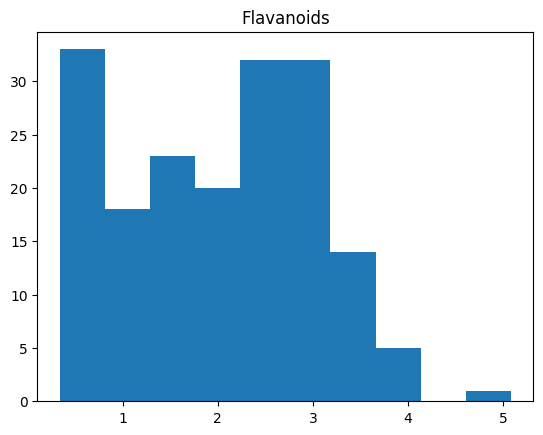

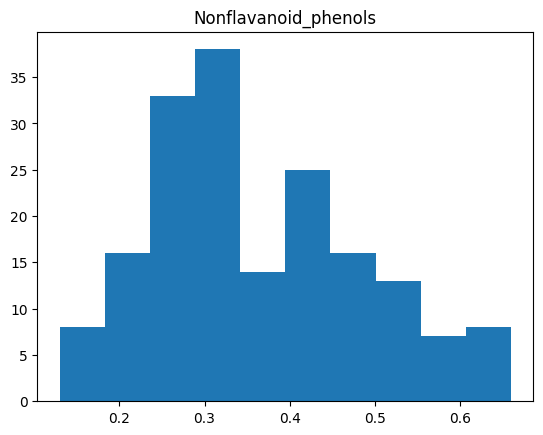

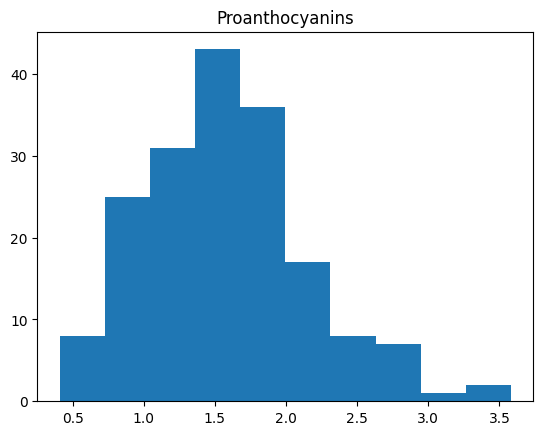

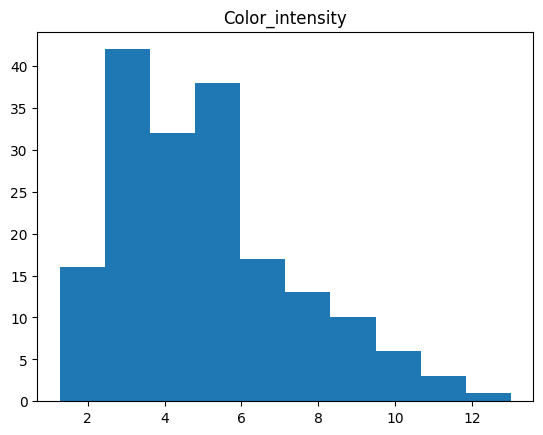

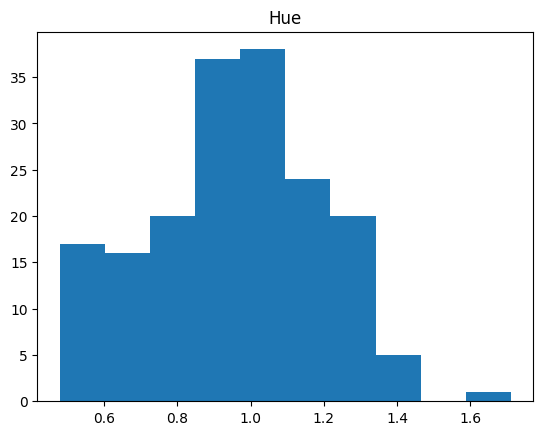

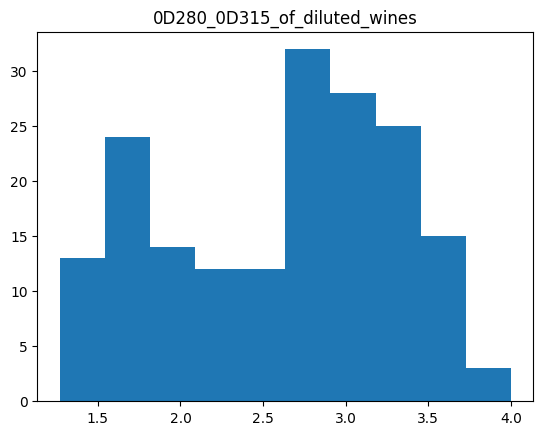

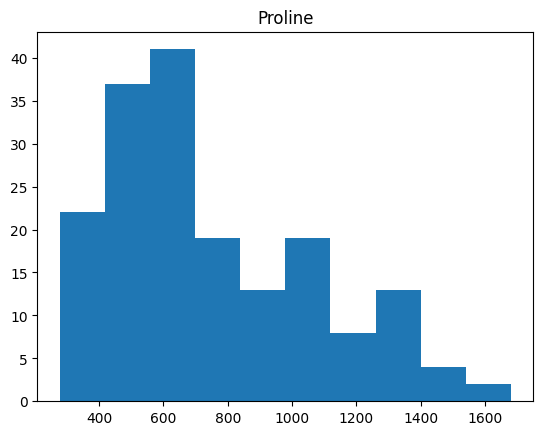

<AxesSubplot: >

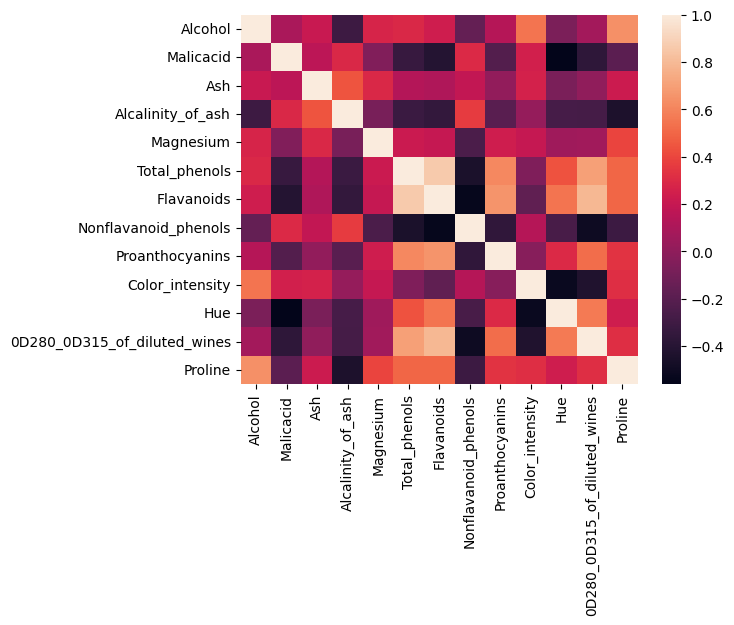

In [8]:
# распределения всех численных признаков
for i in data_features.columns:
    plt.hist(data_features[i])
    plt.title(i)
    plt.show()
plt.show()
# Матрица корреляций
sns.heatmap(corr_matrix)

4.	Разбить данные на test и train. Предварительно убрав колонки с таргетом

In [9]:
trainX, testX, trainY, testY = train_test_split(data_features, data_targets, test_size=0.2, shuffle=True)


5.	Обучить decision tree на 2х самых коррелирующих признаках и не коррелирующих признаках, используя gini. Посмотреть метрики(f1 score,accuracy,precision,recall), сделать выводы, построить ConfusionMatrix  

0.8064160401002506
0.8055555555555556
0.812962962962963
0.8051282051282053


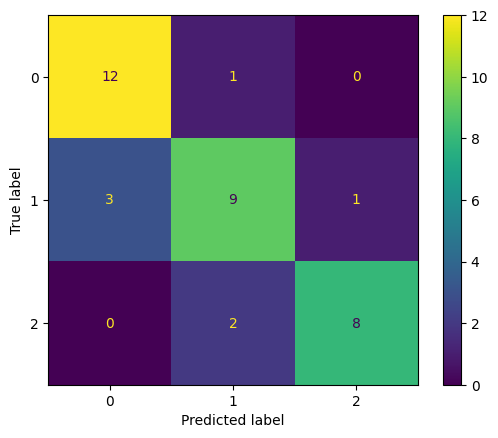

In [10]:
# Самые коррелирующие признаки
trainX1= trainX[['Total_phenols','Flavanoids']] 
testX1 = testX[['Total_phenols','Flavanoids']] 

des_tree1 = tree.DecisionTreeClassifier(criterion='gini')
des_tree1 = des_tree1.fit(pd.DataFrame(trainX1), pd.DataFrame(trainY))
fittedY1 = des_tree1.predict(pd.DataFrame(testX1))
cm1 = skmetrics.confusion_matrix(testY, fittedY1)

print(skmetrics.f1_score(testY, fittedY1,  average='macro'))
print(skmetrics.accuracy_score(testY, fittedY1))
print(skmetrics.precision_score(testY, fittedY1, average='macro'))
print(skmetrics.recall_score(testY, fittedY1, average='macro'))
skmetrics.ConfusionMatrixDisplay(cm1).plot()



0.6648604269293925
0.6388888888888888
0.6761904761904761
0.6585470085470085


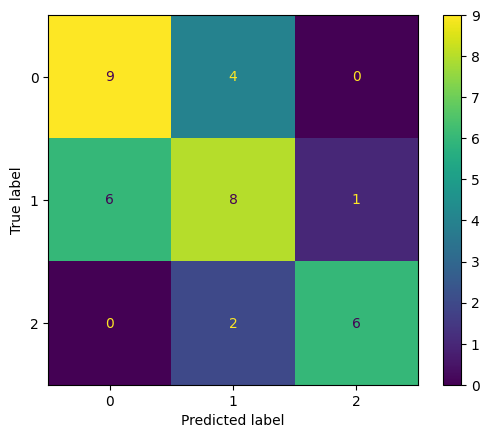

In [52]:

# Самые не коррелирующие признаки
trainX2= trainX[['0D280_0D315_of_diluted_wines',  'Ash']] 
testX2 = testX[['0D280_0D315_of_diluted_wines',  'Ash']] 

des_tree2 = tree.DecisionTreeClassifier(criterion='gini')
des_tree2 = des_tree2.fit(pd.DataFrame(trainX2), pd.DataFrame(trainY))
fittedY2 = des_tree2.predict(pd.DataFrame(testX2))
cm2 = skmetrics.confusion_matrix(testY, fittedY2)

print(skmetrics.f1_score(testY, fittedY2,  average='macro'))
print(skmetrics.accuracy_score(testY, fittedY2))
print(skmetrics.precision_score(testY, fittedY2, average='macro'))
print(skmetrics.recall_score(testY, fittedY2, average='macro'))
skmetrics.ConfusionMatrixDisplay(cm2).plot()


6.	Обучить на выбор (SVM, XGboost,RandomForest), на всех признаках. Получить результат, отобразить метрики как в пункте 5, в случае обучения методов использующих деревья отразить важность признаков

0.9701104613385314
0.9722222222222222
0.9761904761904763
0.9666666666666667


c:\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


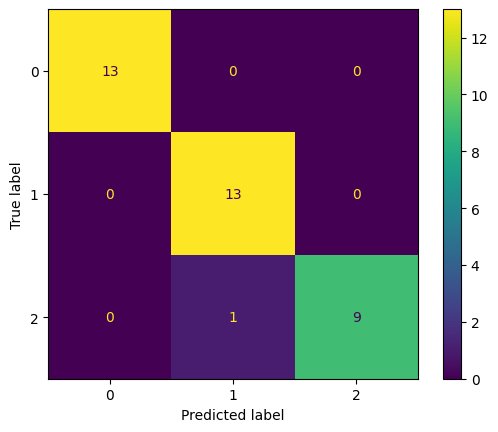

In [11]:
le = LabelEncoder()
entrainY = le.fit_transform(trainY)

model = xgb.XGBClassifier()
model.fit(trainX, entrainY)
enfittedY3 = model.predict(testX)
fittedY3 = le.inverse_transform(enfittedY3)
cm3 = skmetrics.confusion_matrix(testY, fittedY3)

print(skmetrics.f1_score(testY, fittedY3,  average='macro'))
print(skmetrics.accuracy_score(testY, fittedY3))
print(skmetrics.precision_score(testY, fittedY3, average='macro'))
print(skmetrics.recall_score(testY, fittedY3, average='macro'))

skmetrics.ConfusionMatrixDisplay(cm3).plot()

7.	Построить график roc curve

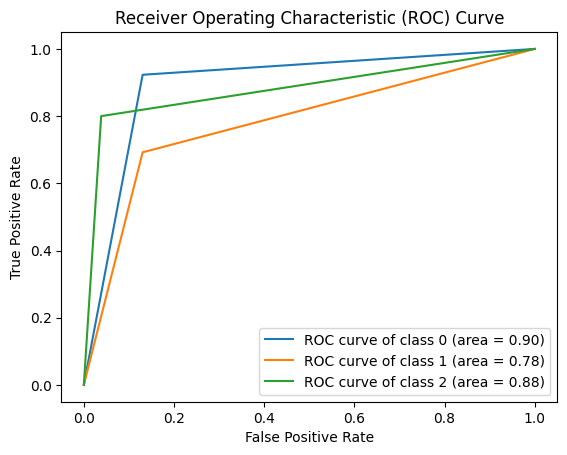

In [12]:
btestY = label_binarize(testY, classes=[1, 2, 3])
bfittedY1 = label_binarize(fittedY1, classes=[1, 2, 3])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = skmetrics.roc_curve(btestY[:, i], bfittedY1[:, i])
    roc_auc[i] = skmetrics.auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
plt.show()


